<a href="https://colab.research.google.com/github/Prahlad77044/ml_beginner/blob/main/Customer_Purchasing_Behaviors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Packages


In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression

In [35]:
df=pd.read_csv("Customer Purchasing Behaviors.csv")

#Understanding and Transforming Data

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


In [37]:
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [38]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separate target
X = df.drop(columns=['loyalty_score', 'user_id'])  # Also drop user_id (not predictive)
y = df['loyalty_score']

# One-hot encode region
region_dummies = pd.get_dummies(X['region'], drop_first=True)
X = X.drop('region', axis=1)
X = pd.concat([X, region_dummies], axis=1)

# Scale annual income
scaler = StandardScaler()
X[['annual_income']] = scaler.fit_transform(X[['annual_income']])


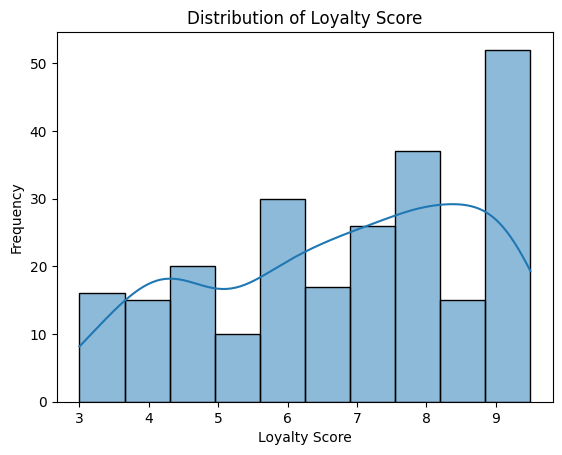

In [11]:
sns.histplot(y, kde=True, bins=10)
plt.title("Distribution of Loyalty Score")
plt.xlabel("Loyalty Score")
plt.ylabel("Frequency")
plt.show()

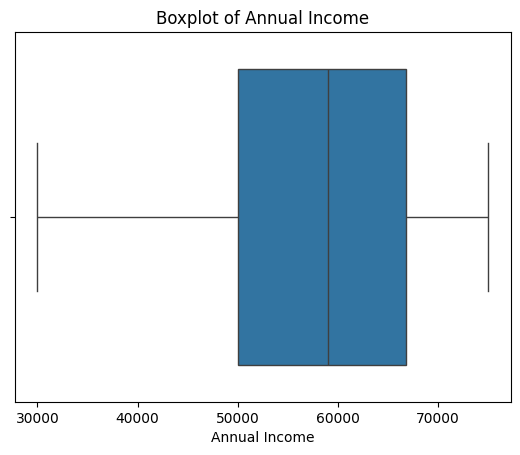

In [12]:
sns.boxplot(x=df['annual_income'])
plt.title("Boxplot of Annual Income")
plt.xlabel("Annual Income")
plt.show()

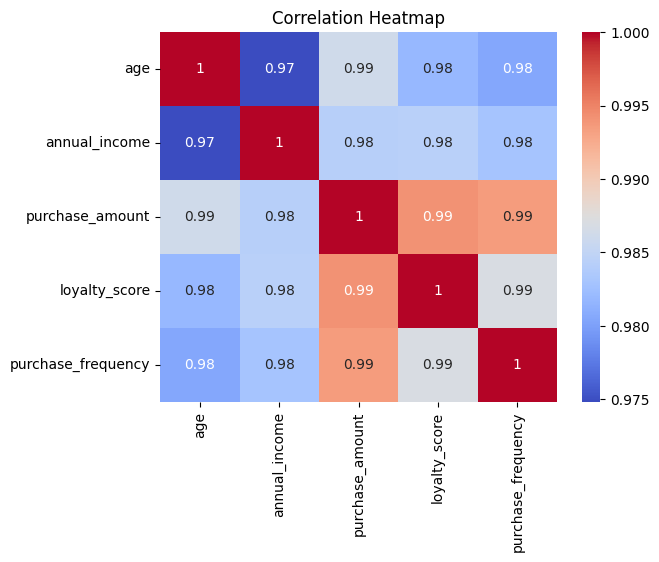

In [13]:
corr = df.drop(columns=['user_id', 'region']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

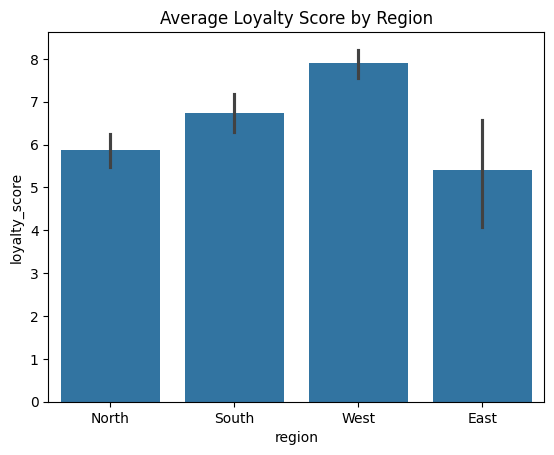

In [14]:
sns.barplot(x='region', y='loyalty_score', data=df)
plt.title("Average Loyalty Score by Region")
plt.show()

In [15]:
X_train,X_,y_train,y_=train_test_split(X,y,test_size=0.4,random_state=42)
X_cv,X_test,y_cv,y_test=train_test_split(X_,y_,test_size=0.2,random_state=42)

In [17]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [27]:
scorelin=linear_model.predict(X_test)
def classify_loyalty(scorelin):
    if scorelin < 3.5:
        return 'Low Loyalty'
    elif scorelin < 7.0:
        return 'Medium Loyalty'
    else:
        return 'High Loyalty'

# Example usage:
predicted_score = 6.8
loyalty_class = classify_loyalty(predicted_score)
print(f"The customer loyalty class is: {loyalty_class}")

The customer loyalty class is: Medium Loyalty


In [28]:
from sklearn.metrics import r2_score, mean_squared_error

# y_test and y_pred must match shapes — both 1D arrays
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)  # Not y_cv
print(f"Mean Squared Error: {mse:.4f}")


R² Score: 0.9839
Mean Squared Error: 0.0521


In [29]:
xgb_model=XGBRegressor(n_estimators=100)
xgb_model.fit(X_train,y_train)
y_pred_xgb=xgb_model.predict(X_test)

In [30]:
r21 = r2_score(y_test, y_pred_xgb)  # Correct method to calculate R² manually
print(f"R² Score for XGB model: {r21}")
mse1=mean_squared_error(y_test,y_pred_xgb)
print(f"MSE for XGB model: {mse1}")

R² Score for XGB model: 0.9961717682647228
MSE for XGB model: 0.012389210659084257


In [39]:

score=xgb_model.predict(X_test)

def classify_loyalty(score):
    if score < 3.5:
        return 'Low Loyalty'
    elif score < 7.0:
        return 'Medium Loyalty'
    else:
        return 'High Loyalty'


loyalty_class = classify_loyalty(predicted_score)
print(f"The customer loyalty class is: {loyalty_class}")


The customer loyalty class is: Medium Loyalty


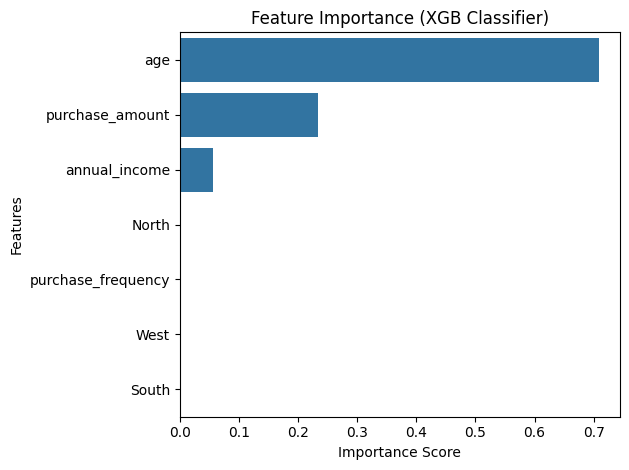

In [40]:
importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance (XGB Classifier)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()